# **Data Extraction**

### 20210901 - 20220331

In [1]:
import pandas as pd

# File paths
file1_path = "History and Forecast CSV/History and Forecast Report-20210901 - 20220331_MF03.csv"

# Step 1: Load dataset and inspect manually to determine correct header row
df1_raw = pd.read_csv(file1_path, skiprows=4, delimiter=",", engine="python")

# Step 2: Drop completely empty columns
df1_raw.dropna(axis=1, how="all", inplace=True)

# Step 3: Drop rows that are entirely NaN
df1_raw.dropna(how="all", inplace=True)

# Reset index
df1_raw.reset_index(drop=True, inplace=True)

# Step 4: Ensure Date column is correctly formatted
df1_raw.rename(columns={df1_raw.columns[0]: "Date"}, inplace=True)

df1_raw["Date"] = pd.to_datetime(df1_raw["Date"].str.strip(), format="%d-%m-%Y %H:%M", errors="coerce")

# Drop last 2 rows from df1_raw
df1_raw = df1_raw.iloc[:-2]

df1_raw.rename(columns={
    'Saleable': 'Total Room Inventory',
    'Booked': 'Rooms Sold',
    'Arrival': 'Arrival Rooms',
    'Comp': 'Compliment Rooms',
    'Fit': 'Individual Confirm',
    'Occ %': 'Occupancy %',
    'Room Rev': 'Room Revenue',
    'Dep Rooms': 'Departure Rooms',
    'Total Pax': 'Pax',
    'Average Rate': 'ARR'
}, inplace=True)

# Adding snapshot_date, arrival_date and actual_or_forecast columns in df1_raw
for idx, row in df1_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df1_raw.loc[idx, "snapshot_date"] = snapshot_date
    df1_raw["arrival_date"] = pd.to_datetime(df1_raw["Date"], errors="coerce")
    df1_raw["actual_or_forecast"] = "actual"

df1_raw["Day"] = df1_raw["Date"].dt.day_name()

df1_raw


,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2022-03-27,114.0,113.0,63.0,0.0,2.0,113.0,97.3684,824147.49,7293.3406,64.0,18.0,167.0,2022-03-27,2022-03-27,actual,Sunday
208,2022-03-28,113.0,113.0,43.0,0.0,1.0,113.0,99.1150,903418.02,7994.8497,46.0,19.0,164.0,2022-03-28,2022-03-28,actual,Monday
209,2022-03-29,113.0,111.0,38.0,0.0,2.0,111.0,96.4602,891644.40,8032.8324,41.0,19.0,167.0,2022-03-29,2022-03-29,actual,Tuesday
210,2022-03-30,112.0,111.0,42.0,0.0,2.0,111.0,97.3214,905389.04,8156.6580,43.0,20.0,165.0,2022-03-30,2022-03-30,actual,Wednesday


### 20220401 - 20230205

In [2]:
import pandas as pd

# File paths
file2_path = "History and Forecast CSV/History and Forecast Report-20220401-20230205_MF03.csv"

# Step 1: Load dataset and inspect manually to determine correct header row
df2_raw = pd.read_csv(file2_path, skiprows=4, delimiter=",", engine="python")

# Step 2: Drop completely empty columns
df2_raw.dropna(axis=1, how="all", inplace=True)

# Step 3: Drop rows that are entirely NaN
df2_raw.dropna(how="all", inplace=True)

# Reset index
df2_raw.reset_index(drop=True, inplace=True)

# Step 4: Ensure Date column is correctly formatted
df2_raw.rename(columns={df2_raw.columns[0]: "Date"}, inplace=True)

df2_raw["Date"] = pd.to_datetime(df2_raw["Date"].str.strip(), format="%d-%m-%Y %H:%M", errors="coerce")


# Drop last 2 rows from df2_raw
df2_raw = df2_raw.iloc[:-2]
df2_raw.rename(columns={
    'Saleable': 'Total Room Inventory',
    'Booked': 'Rooms Sold',
    'Arrival': 'Arrival Rooms',
    'Comp': 'Compliment Rooms',
    'Fit': 'Individual Confirm',
    'Occ %': 'Occupancy %',
    'Room Rev': 'Room Revenue',
    'Dep Rooms': 'Departure Rooms',
    'Total Pax': 'Pax',
    'Average Rate': 'ARR'
}, inplace=True)

# Adding snapshot_date, arrival_date and actual_or_forecast columns in df2_raw
for idx, row in df2_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df2_raw.loc[idx, "snapshot_date"] = snapshot_date
    df2_raw["arrival_date"] = pd.to_datetime(df2_raw["Date"], errors="coerce")
    df2_raw["actual_or_forecast"] = "actual"

df2_raw["Day"] = df2_raw["Date"].dt.day_name()


df2_raw

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2022-04-01,113.0,102.0,51.0,0.0,3.0,102.0,87.6106,786609.73,7711.8600,51.0,19.0,148.0,2022-04-01,2022-04-01,actual,Friday
1,2022-04-02,113.0,101.0,48.0,0.0,3.0,101.0,86.7257,835578.56,8273.0550,49.0,19.0,153.0,2022-04-02,2022-04-02,actual,Saturday
2,2022-04-03,112.0,90.0,55.0,1.0,3.0,90.0,76.7857,751104.71,8345.6078,64.0,21.0,132.0,2022-04-03,2022-04-03,actual,Sunday
3,2022-04-04,113.0,101.0,52.0,1.0,2.0,101.0,86.7257,993025.66,9831.9372,41.0,20.0,138.0,2022-04-04,2022-04-04,actual,Monday
4,2022-04-05,113.0,93.0,38.0,1.0,2.0,93.0,79.6460,779638.77,8383.2125,46.0,19.0,130.0,2022-04-05,2022-04-05,actual,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2023-02-01,119.0,118.0,37.0,0.0,2.0,118.0,97.4790,1525371.79,12926.8795,33.0,11.0,155.0,2023-02-01,2023-02-01,actual,Wednesday
307,2023-02-02,120.0,118.0,29.0,0.0,3.0,118.0,95.8333,1448656.84,12276.7528,29.0,10.0,159.0,2023-02-02,2023-02-02,actual,Thursday
308,2023-02-03,120.0,119.0,36.0,0.0,2.0,119.0,97.5000,1532358.27,12876.9602,35.0,10.0,173.0,2023-02-03,2023-02-03,actual,Friday
309,2023-02-04,121.0,121.0,60.0,2.0,2.0,121.0,96.6942,1526782.32,12618.0357,60.0,9.0,189.0,2023-02-04,2023-02-04,actual,Saturday


### 20230201 - 20231025

In [3]:
import pandas as pd

file_path = "History and Forecast CSV\History and Forecast Report 20230201 - 20231025_History_and_Forecast_Report.csv"

df3_raw = pd.read_csv(file_path, skiprows=3)

# Convert Date column to datetime format
df3_raw.rename(columns={df3_raw.columns[0]: "Date"}, inplace=True)  # Explicitly rename date column
df3_raw["Date"] = pd.to_datetime(df3_raw["Date"], errors="coerce")

df3_raw.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue"
]
df3_raw.drop(columns=redundant_columns, inplace=True)

cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]

df3_raw.drop(columns=cols_to_rem, inplace=True)

for idx, row in df3_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df3_raw.loc[idx, "snapshot_date"] = snapshot_date
    df3_raw["arrival_date"] = pd.to_datetime(df3_raw["Date"], errors="coerce")
    df3_raw["actual_or_forecast"] = "actual"
df3_raw

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-10-21,Saturday,100.0,44.0,1.0,3.0,104.0,89.29,1491531.14,14915.31,33.0,18.0,149.0,112.0,2023-10-21,2023-10-21,actual
263,2023-10-22,Sunday,92.0,39.0,1.0,3.0,96.0,84.40,1424739.24,15486.30,49.0,21.0,153.0,109.0,2023-10-22,2023-10-22,actual
264,2023-10-23,Monday,90.0,33.0,0.0,3.0,93.0,80.36,1207595.55,13417.73,36.0,18.0,141.0,112.0,2023-10-23,2023-10-23,actual
265,2023-10-24,Tuesday,101.0,45.0,0.0,2.0,103.0,87.83,1336085.33,13228.57,37.0,15.0,156.0,115.0,2023-10-24,2023-10-24,actual


### 20230401 - 20240331

In [4]:
import pandas as pd

file_path = "History and Forecast CSV\History_and_Forecast_Report 20230401 - 20240331_History_and_Forecast_Report.csv"

df4_raw = pd.read_csv(file_path, skiprows=3)

# Convert Date column to datetime format
df4_raw.rename(columns={df4_raw.columns[0]: "Date"}, inplace=True)  # Explicitly rename date column
df4_raw["Date"] = pd.to_datetime(df4_raw["Date"], errors="coerce")

df4_raw.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue"
]
df4_raw.drop(columns=redundant_columns, inplace=True)

cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]

df4_raw.drop(columns=cols_to_rem, inplace=True)

for idx, row in df4_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df4_raw.loc[idx, "snapshot_date"] = snapshot_date
    df4_raw["arrival_date"] = pd.to_datetime(df4_raw["Date"], errors="coerce")
    df4_raw["actual_or_forecast"] = "actual"
df4_raw

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-04-01,Saturday,111.0,48.0,3.0,1.0,115.0,93.28,1162842.58,10476.06,49.0,11.0,180.0,119.0,2023-04-01,2023-04-01,actual
1,2023-04-02,Sunday,97.0,50.0,1.0,4.0,102.0,83.62,1079504.25,11128.91,63.0,14.0,160.0,116.0,2023-04-02,2023-04-02,actual
2,2023-04-03,Monday,88.0,40.0,0.0,4.0,92.0,75.86,931371.15,10583.76,52.0,14.0,132.0,116.0,2023-04-03,2023-04-03,actual
3,2023-04-04,Tuesday,68.0,32.0,1.0,3.0,72.0,61.82,776760.70,11422.95,53.0,20.0,108.0,110.0,2023-04-04,2023-04-04,actual
4,2023-04-05,Wednesday,54.0,29.0,0.0,2.0,56.0,49.54,647427.35,11989.40,45.0,21.0,79.0,109.0,2023-04-05,2023-04-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-03-27,Wednesday,91.0,45.0,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0,2024-03-27,2024-03-27,actual
362,2024-03-28,Thursday,97.0,46.0,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0,2024-03-28,2024-03-28,actual
363,2024-03-29,Friday,98.0,41.0,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0,2024-03-29,2024-03-29,actual
364,2024-03-30,Saturday,97.0,46.0,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0,2024-03-30,2024-03-30,actual


### 20230206
### ....
### 20250113
### combined files


In [5]:
import os
import glob
import numpy as np
import pandas as pd

# Columns expected from each CSV
COLS = [
    "Date","Day","Rooms Sold","Rooms for Sale","Arrival Rooms","Compliment Rooms",
    "House Use","Hold","Individual Confirm","Individual Tentative",
    "Group Confirm","Group Tentative","Occupancy %","Room Revenue","ARR",
    "Inclusion Revenue","Departure Rooms","OOO Rooms","Pax",
    "Individual Revenue","Individual ARR","Confirmed Group Revenue","Confirmed Group ARR",
    "Tentative Group Revenue","Tentative Group ARR","Total Room Inventory"
]

FINAL_COLS = COLS + ["snapshot_date","arrival_date","actual_or_forecast"]

# 1) Directory containing your CSV files
csv_dir = "History and Forecast CSV"

# 2) List all CSVs, then skip first 3 and the last
all_csv_files = sorted(glob.glob(os.path.join(csv_dir, "*.csv")))
files_to_use = all_csv_files[3:-1]

print(f"Found {len(all_csv_files)} CSV files in {csv_dir}")
print("Skipping first 3 and last file, using these CSVs:")
# for f in files_to_use:
#     print("  ", f)

combined_data = []

for filepath in files_to_use:
    # A) Parse snapshot_date from filename
    filename = os.path.basename(filepath)             # e.g. "20250113_History_and_Forecast_Report.csv"
    filedate_str = os.path.splitext(filename)[0]      # e.g. "20250113_History_and_Forecast_Report"
    
    # Optional: If your date is strictly at start (YYYYMMDD), parse that slice:
    # For instance, if your filename is "History and Forecast Report-20250113_History_and_Forecast_Report.csv"
    # you might extract the substring after "Report-" and before "_History":
    # e.g. "20250113"
    # Then parse that as snapshot_date:
    try:
        # Example: find the substring that is your 8-digit date
        # adjust logic depending on your real filenames
        # Here, let's just do a simplistic approach:
        date_part = filedate_str.split("-")[-1].replace("_History_and_Forecast_Report","")
        snapshot_date = pd.to_datetime(date_part, format="%Y%m%d", errors="coerce")
    except ValueError:
        snapshot_date = None

    # print(f"\n--- READING FILE: {filepath}")
    # print("Parsed snapshot_date =", snapshot_date)

    # B) Read CSV, skipping top 3 lines so line 4 is the header row
    #    Adjust skiprows if needed; from your screenshots it looked like:
    #      1) "History and Forecast Report ..."
    #      2) "The Claridges"
    #      3) "Date From: ... Date To: ..."
    #    Then line 4 = real header: "Date,Day,Rooms Sold, ..."
    df_temp = pd.read_csv(filepath, skiprows=3, header=0)
    
    # print("Initial columns read:", df_temp.columns.tolist())
    # print(df_temp.head(5))

    # C) Drop the row with "Total (History)" if it appears in 'Day'
    #    Also drop any blank lines
    # df_temp = df_temp[df_temp["Day"] != "Total (History)"]
    # Modify the filtering condition to exclude multiple values
    df_temp = df_temp[~df_temp["Day"].isin(["Total (History)", "Total (Forecast)", "Grand Total"])]
  
    df_temp.dropna(subset=["Date","Day"], how="all", inplace=True)

    # D) Optionally separate the "actual" row (the first row in the data)
    #    from the forecast rows (the rest). Typically row 0 is your actual day, 
    #    row 1+ = forecast. But only do this if the file structure is consistent.
    #    Otherwise you can keep them all in df_temp. 
    df_temp.reset_index(drop=True, inplace=True)

    # If you truly know that row 0 is actual, row 1+ is forecast, do:
    # actual_row = df_temp.iloc[[0]].copy()
    # forecast_rows = df_temp.iloc[1:].copy()
    # df_temp = pd.concat([actual_row, forecast_rows], ignore_index=True)

    # E) Reindex columns to ensure they match your expected COLS exactly
    #    If the file has extra columns or missing columns, you'll see NaN or lose data here.
    df_temp = df_temp.reindex(columns=COLS)
    

    # F) Add snapshot_date
    df_temp["snapshot_date"] = snapshot_date

    # G) Convert "Date" column to a datetime
    df_temp["arrival_date"] = pd.to_datetime(df_temp["Date"], errors="coerce")

    # H) Mark rows as 'actual' vs 'forecast'
    #    Simple assumption: if arrival_date == snapshot_date => 'actual', else 'forecast'
    df_temp["actual_or_forecast"] = np.where(
        df_temp["arrival_date"] == df_temp["snapshot_date"],
        "actual",
        "forecast"
    )

    # I) Reorder final columns
    df_temp = df_temp.reindex(columns=FINAL_COLS)

    # J) Append to combined list
    combined_data.append(df_temp)

# 3) Concatenate
df_comb_daywise = pd.concat(combined_data, ignore_index=True)
print("\nFINAL Master shape:", df_comb_daywise.shape)
df_comb_daywise

# j=1
# for i in files_to_use:
#     print(j,":",i)
#     j=j+1


Found 685 CSV files in History and Forecast CSV
Skipping first 3 and last file, using these CSVs:

FINAL Master shape: (124367, 29)


,Date,Day,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-05 00:00:00,Sunday,105.0,8.0,50.0,2.0,3.0,0.0,110.0,0.0,...,1499626.34,13632.97,0.00,0.00,0.0,0.0,118.0,2023-02-06,2023-02-05,forecast
1,2023-02-06 00:00:00,Monday,101.0,12.0,68.0,2.0,3.0,0.0,34.0,26.0,...,731411.39,12190.19,587105.96,14319.66,0.0,0.0,118.0,2023-02-06,2023-02-06,actual
2,2023-02-07 00:00:00,Tuesday,113.0,3.0,31.0,2.0,2.0,0.0,34.0,32.0,...,824954.22,12499.31,653105.96,14513.47,0.0,0.0,120.0,2023-02-06,2023-02-07,forecast
3,2023-02-08 00:00:00,Wednesday,114.0,3.0,34.0,2.0,2.0,0.0,32.0,40.0,...,909711.69,12634.88,594241.54,15236.96,0.0,0.0,121.0,2023-02-06,2023-02-08,forecast
4,2023-02-09 00:00:00,Thursday,115.0,0.0,36.0,2.0,2.0,0.0,26.0,44.0,...,865637.91,12366.26,620894.08,18814.97,0.0,0.0,119.0,2023-02-06,2023-02-09,forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124362,2026-01-09 00:00:00,Friday,14.0,108.0,0.0,0.0,0.0,0.0,0.0,2.0,...,40000.00,20000.00,0.00,0.00,0.0,0.0,122.0,2025-01-13,2026-01-09,forecast
124363,2026-01-10 00:00:00,Saturday,14.0,108.0,2.0,0.0,0.0,0.0,0.0,2.0,...,0.00,0.00,0.00,0.00,0.0,0.0,122.0,2025-01-13,2026-01-10,forecast
124364,2026-01-11 00:00:00,Sunday,18.0,104.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,272000.00,18133.33,0.0,0.0,122.0,2025-01-13,2026-01-11,forecast
124365,2026-01-12 00:00:00,Monday,31.0,91.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,416000.00,16000.00,0.0,0.0,122.0,2025-01-13,2026-01-12,forecast


In [6]:
columns_to_drop = ["Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue","Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]
df_comb_daywise.drop(columns=columns_to_drop, inplace=True)
df_comb_daywise

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-06,2023-02-05,forecast
1,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.35,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
2,2023-02-07 00:00:00,Tuesday,113.0,31.0,2.0,2.0,34.0,94.17,1478060.18,13080.18,20.0,10.0,188.0,120.0,2023-02-06,2023-02-07,forecast
3,2023-02-08 00:00:00,Wednesday,114.0,34.0,2.0,2.0,32.0,94.21,1503953.23,13192.57,33.0,9.0,193.0,121.0,2023-02-06,2023-02-08,forecast
4,2023-02-09 00:00:00,Thursday,115.0,36.0,2.0,2.0,26.0,96.64,1486531.99,12926.37,35.0,11.0,202.0,119.0,2023-02-06,2023-02-09,forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124362,2026-01-09 00:00:00,Friday,14.0,0.0,0.0,0.0,0.0,11.48,40000.00,2857.14,1.0,8.0,5.0,122.0,2025-01-13,2026-01-09,forecast
124363,2026-01-10 00:00:00,Saturday,14.0,2.0,0.0,0.0,0.0,11.48,0.00,0.00,2.0,8.0,5.0,122.0,2025-01-13,2026-01-10,forecast
124364,2026-01-11 00:00:00,Sunday,18.0,2.0,0.0,0.0,0.0,14.75,272000.00,15111.11,2.0,8.0,4.0,122.0,2025-01-13,2026-01-11,forecast
124365,2026-01-12 00:00:00,Monday,31.0,2.0,0.0,0.0,0.0,25.41,416000.00,13419.35,0.0,8.0,6.0,122.0,2025-01-13,2026-01-12,forecast


### Combining df1_raw, df2_raw, df3_raw and df4_raw

In [7]:
df_4_files_combined = pd.concat([df1_raw,df2_raw, df3_raw, df4_raw], ignore_index=True)
df_4_files_combined

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,1427730.15,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday
1152,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,1457687.18,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday
1153,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,1468948.25,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday
1154,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,1407306.52,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday


# Working with the 4 combined files

#### overview

In [8]:
# 1.1. Shape of the DataFrame
print("Shape:", df_4_files_combined.shape)

# 1.2. First few rows
print("First 5 rows:")
display(df_4_files_combined.head())

# 1.3. Column names
print("Columns:", df_4_files_combined.columns.tolist())

# 1.4. Data types info
print("Info:")
df_4_files_combined.info()

# 1.5. Summary statistics for numeric columns
print("Description (numeric):")
display(df_4_files_combined.describe())

# 1.6. Summary statistics for all columns (including object types)
print("Description (all):")
display(df_4_files_combined.describe(include="all"))

Shape: (1156, 17)
First 5 rows:


,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday


Columns: ['Date', 'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR', 'Departure Rooms', 'OOO Rooms', 'Pax', 'snapshot_date', 'arrival_date', 'actual_or_forecast', 'Day']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1156 non-null   datetime64[ns]
 1   Total Room Inventory  1156 non-null   float64       
 2   Rooms Sold            1156 non-null   float64       
 3   Arrival Rooms         1156 non-null   float64       
 4   Compliment Rooms      1156 non-null   float64       
 5   House Use             1156 non-null   float64       
 6   Individual Confirm    1156 non-null   float64       
 7   Occupancy %           1156 non-null   float64       
 8   Room Revenue          1156 non-null

,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03,1156.000000,1156.000000,1156.000000,1156.000000
mean,109.339965,89.498270,41.256920,0.764706,3.390138,88.196367,79.581074,9.632051e+05,10810.455586,41.677336,22.118512,137.185986
std,9.403757,21.600766,12.672795,1.389509,1.560621,21.642759,15.768593,4.260887e+05,7215.981479,13.862549,10.544023,35.021441
min,50.000000,19.000000,1.000000,0.000000,0.000000,19.000000,22.000000,1.360455e+05,5127.555200,2.000000,7.000000,29.000000
25%,106.000000,75.000000,33.000000,0.000000,2.000000,73.000000,69.444400,6.580432e+05,8031.134850,32.000000,15.000000,114.000000
50%,111.000000,95.000000,41.000000,0.000000,3.000000,92.000000,84.160000,8.449025e+05,10514.750000,41.000000,20.000000,142.000000
75%,116.000000,107.000000,49.000000,1.000000,4.000000,106.000000,92.520850,1.283279e+06,12872.542550,50.000000,26.000000,162.000000
max,123.000000,121.000000,83.000000,17.000000,16.000000,121.000000,100.000000,4.698585e+06,167806.610000,90.000000,92.000000,219.000000


Description (all):


C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\322964774.py:21: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df_4_files_combined.describe(include="all"))
C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\322964774.py:21: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df_4_files_combined.describe(include="all"))
C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\322964774.py:21: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to sile

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
count,1156,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03,1156.000000,1156.000000,1156.000000,1156.000000,1156,1156,1156,1156
unique,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943,943,1,7
top,2023-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-10 00:00:00,2023-08-10 00:00:00,actual,Wednesday
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1156,166
first,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 00:00:00,2021-09-01 00:00:00,NaN,NaN
last,2024-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-31 00:00:00,2024-03-31 00:00:00,NaN,NaN
mean,NaN,109.339965,89.498270,41.256920,0.764706,3.390138,88.196367,79.581074,9.632051e+05,10810.455586,41.677336,22.118512,137.185986,NaN,NaN,NaN,NaN
std,NaN,9.403757,21.600766,12.672795,1.389509,1.560621,21.642759,15.768593,4.260887e+05,7215.981479,13.862549,10.544023,35.021441,NaN,NaN,NaN,NaN
min,NaN,50.000000,19.000000,1.000000,0.000000,0.000000,19.000000,22.000000,1.360455e+05,5127.555200,2.000000,7.000000,29.000000,NaN,NaN,NaN,NaN
25%,NaN,106.000000,75.000000,33.000000,0.000000,2.000000,73.000000,69.444400,6.580432e+05,8031.134850,32.000000,15.000000,114.000000,NaN,NaN,NaN,NaN


### Removing duplicates

In [9]:
df_4_files_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1156 non-null   datetime64[ns]
 1   Total Room Inventory  1156 non-null   float64       
 2   Rooms Sold            1156 non-null   float64       
 3   Arrival Rooms         1156 non-null   float64       
 4   Compliment Rooms      1156 non-null   float64       
 5   House Use             1156 non-null   float64       
 6   Individual Confirm    1156 non-null   float64       
 7   Occupancy %           1156 non-null   float64       
 8   Room Revenue          1156 non-null   float64       
 9   ARR                   1156 non-null   float64       
 10  Departure Rooms       1156 non-null   float64       
 11  OOO Rooms             1156 non-null   float64       
 12  Pax                   1156 non-null   float64       
 13  snapshot_date     

#### Count duplicates based on 'Date'


In [10]:
duplicate_count = df_4_files_combined.duplicated(subset=['Date']).sum()
print("Number of duplicate rows based on 'Date':", duplicate_count)

Number of duplicate rows based on 'Date': 213


#### Remove duplicate rows (keeping the first occurrence)

In [11]:
df_4_files_combined = df_4_files_combined.drop_duplicates(subset=['Date'], keep='first')


In [12]:
df_4_files_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  943 non-null    datetime64[ns]
 1   Total Room Inventory  943 non-null    float64       
 2   Rooms Sold            943 non-null    float64       
 3   Arrival Rooms         943 non-null    float64       
 4   Compliment Rooms      943 non-null    float64       
 5   House Use             943 non-null    float64       
 6   Individual Confirm    943 non-null    float64       
 7   Occupancy %           943 non-null    float64       
 8   Room Revenue          943 non-null    float64       
 9   ARR                   943 non-null    float64       
 10  Departure Rooms       943 non-null    float64       
 11  OOO Rooms             943 non-null    float64       
 12  Pax                   943 non-null    float64       
 13  snapshot_date      

### converting the revenue to int

In [13]:
df_4_files_combined.loc[:, 'Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)

C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\2460996627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_files_combined.loc[:, 'Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)
C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\2460996627.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_4_files_combined.loc[:, 'Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)


### analyzing data

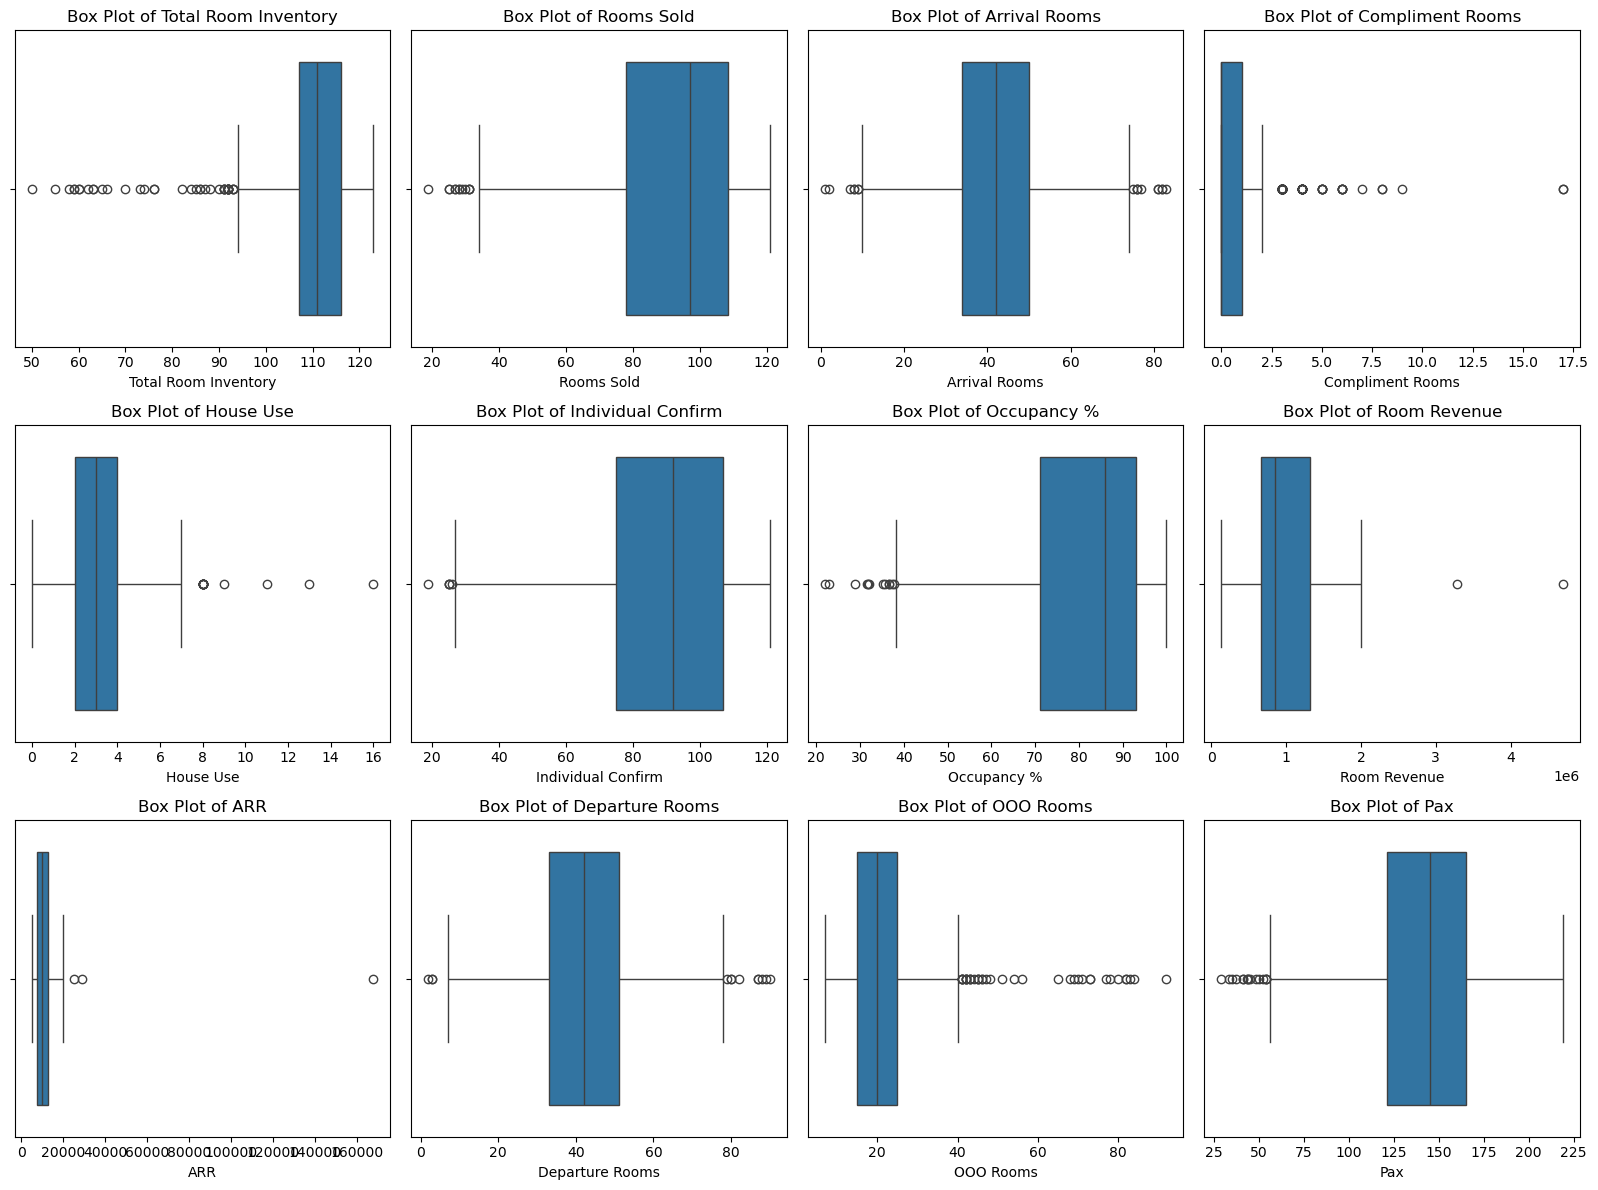

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_4_files_combined.select_dtypes(include='number').columns

# Create a figure with subplots arranged in 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Flatten axes array so we can iterate easily in a single loop
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(data=df_4_files_combined, x=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# If you have fewer than 12 numeric columns, 
# some subplots will be empty, so you can hide them:
for unused_ax in axes[len(numeric_cols):]:
    unused_ax.set_visible(False)

plt.tight_layout()
plt.show()


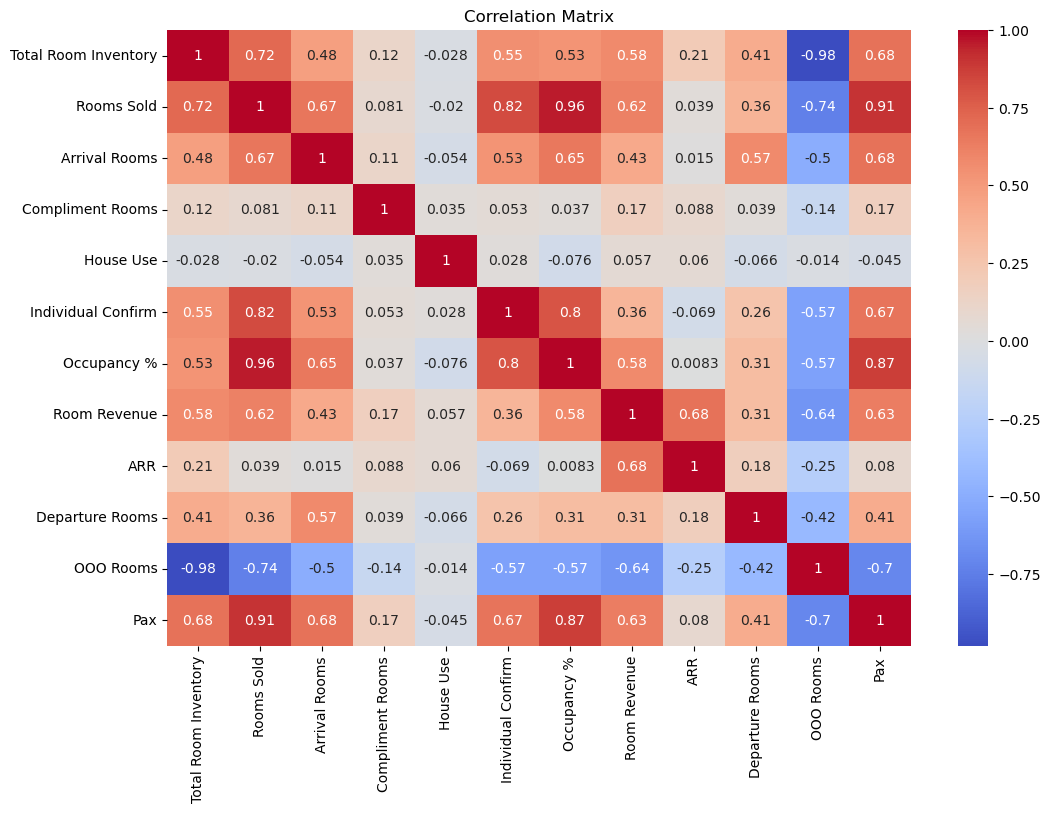

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select numeric columns
df_numeric = df_4_files_combined.select_dtypes(include='number')

# 2. Compute the correlation matrix
corr_matrix = df_numeric.corr()

# 3. Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### VIF (Multicollinearity Check)

- VIF = 1 → no multicollinearity

- VIF < 5 → generally okay

- VIF > 5 → moderate to high multicollinearity

- VIF > 10 → problematic, consider removing the variable or using dimensionality reduction

In [16]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1. Select numeric columns and drop rows with missing values
df_numeric = df_4_files_combined.select_dtypes(include=['float64', 'int64']).dropna()

# 2. Optionally, remove your target variable (Room Revenue) from the VIF calculation 
#    if you only want VIF for the features. 
#    For instance:
# df_numeric = df_numeric.drop(columns=['Room Revenue'], errors='ignore')

# 3. Add a constant term for the intercept (required by statsmodels VIF)
X = sm.add_constant(df_numeric)

# 4. Create a DataFrame to store the results
vif_data = pd.DataFrame()
vif_data["feature"] = df_numeric.columns

# 5. Calculate VIF for each feature
#    NOTE: The 0th column in X is the constant, so we start from index 1
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i+1)  
    for i in range(len(df_numeric.columns))
]

print(vif_data)


                 feature        VIF
0   Total Room Inventory  49.990854
1             Rooms Sold  73.313990
2          Arrival Rooms   2.510607
3       Compliment Rooms   1.169748
4              House Use   1.357863
5     Individual Confirm   3.579317
6            Occupancy %  51.577660
7                    ARR   1.242513
8        Departure Rooms   1.694662
9              OOO Rooms  38.170756
10                   Pax   7.176416


Minimun room revenue: 136045
Maximum room revenue: 4698585


C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\381055266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_files_combined['Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)


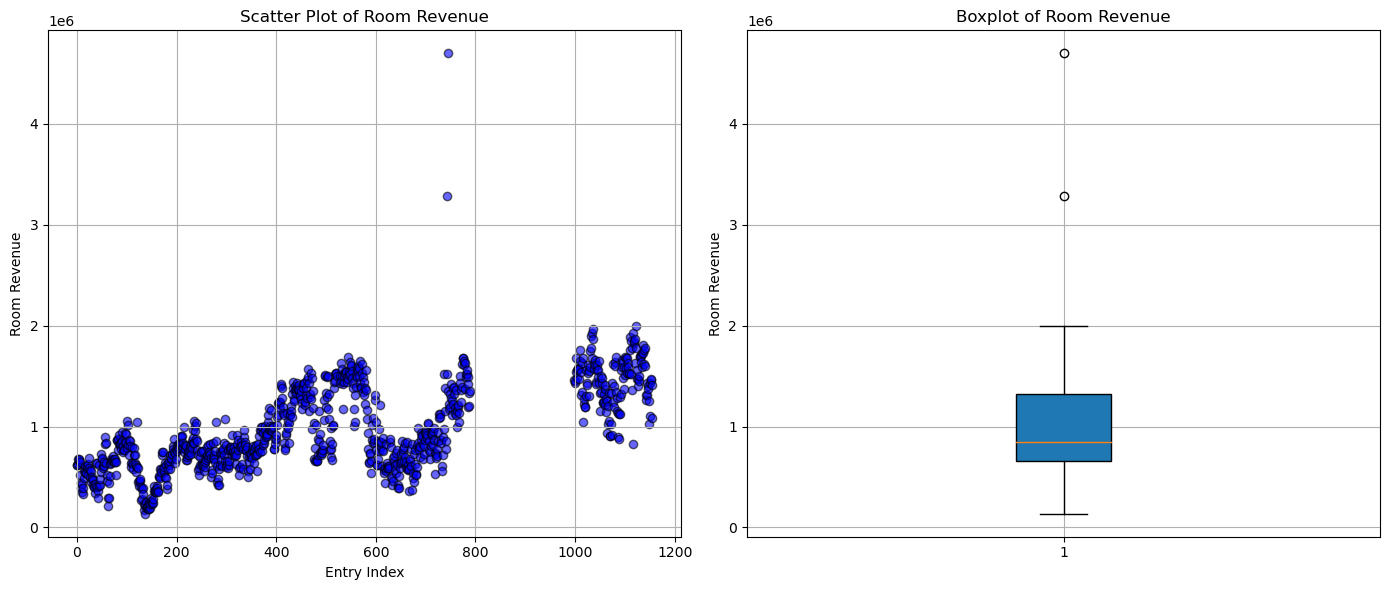

In [17]:
import matplotlib.pyplot as plt

df_4_files_combined['Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)

print("Minimun room revenue: " + str(df_4_files_combined['Room Revenue'].min()))
print("Maximum room revenue: " + str(df_4_files_combined['Room Revenue'].max()))


#PLotting the data to check for outliers
plt.figure(figsize=(14, 6))

# Scatter plot: entry index vs. Room Revenue
plt.subplot(1, 2, 1)
plt.scatter(df_4_files_combined.index, df_4_files_combined['Room Revenue'], alpha=0.6, color='blue', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue')
plt.grid(True)

# Boxplot: visualize distribution and potential outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_4_files_combined['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()

### Removing outliers

In [18]:
Q1 = df_4_files_combined['Room Revenue'].quantile(0.25)
Q3 = df_4_files_combined['Room Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_4_files_combined_no_outliers = df_4_files_combined[(df_4_files_combined['Room Revenue'] >= lower_bound) & (df_4_files_combined['Room Revenue'] <= upper_bound)]

# Optional: Print the number of outliers removed
num_removed = len(df_4_files_combined) - len(df_4_files_combined_no_outliers)
print(f"Removed {num_removed} outliers out of {len(df_4_files_combined)} entries.")

Removed 2 outliers out of 943 entries.


Cleaned Minimun room revenue: 136045
Cleaned Maximum room revenue: 1996523


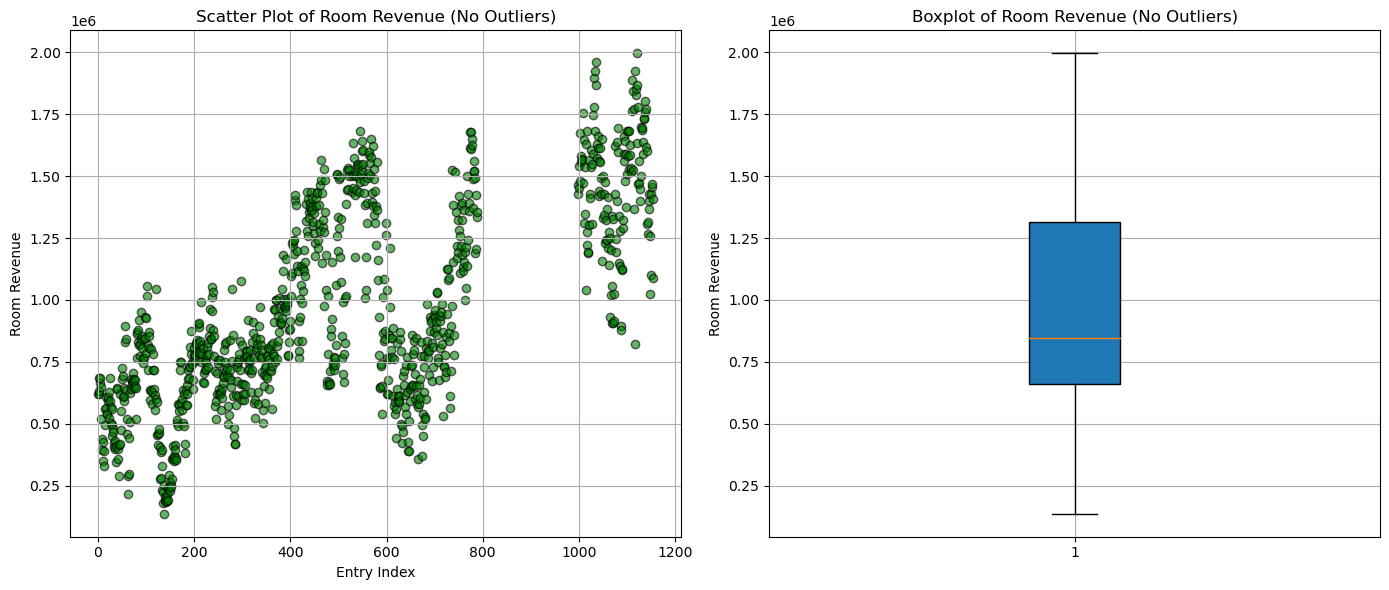

In [19]:
print("Cleaned Minimun room revenue: " + str(df_4_files_combined_no_outliers['Room Revenue'].min()))
print("Cleaned Maximum room revenue: " + str(df_4_files_combined_no_outliers['Room Revenue'].max()))

cleaned_min_df_4_files_combined = df_4_files_combined_no_outliers['Room Revenue'].min()
cleaned_max_df_4_files_combined = df_4_files_combined_no_outliers['Room Revenue'].max()
# Plot the cleaned data

plt.figure(figsize=(14, 6))

# Scatter Plot: Entry index vs. Room Revenue without outliers
plt.subplot(1, 2, 1)
plt.scatter(df_4_files_combined_no_outliers.index, df_4_files_combined_no_outliers['Room Revenue'], alpha=0.6, color='green', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue (No Outliers)')
plt.grid(True)

# Boxplot: Distribution of Room Revenue without outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_4_files_combined_no_outliers['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue (No Outliers)')
plt.grid(True)

plt.tight_layout()
plt.show()


### After Outlier Removal
### ACF and PACF Analysis

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ACF_PACF(df, col):
    # Autocorrelation
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df[col].dropna(), ax=ax[0], lags=30)
    ax[0].set_title(f'ACF - {col}')

    # Partial Autocorrelation
    plot_pacf(df[col].dropna(), ax=ax[1], lags=30, method='ywm')
    ax[1].set_title(f'PACF - {col}')

    plt.tight_layout()
    plt.show()


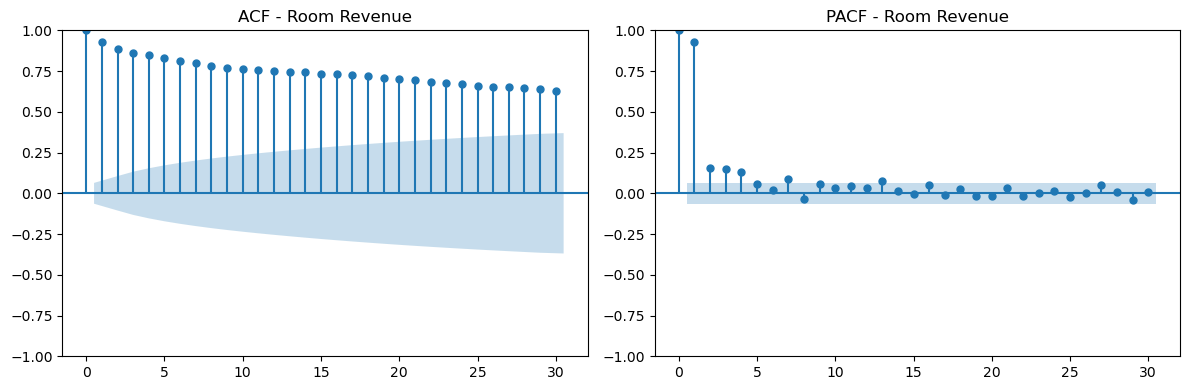

In [21]:
ACF_PACF(df_4_files_combined_no_outliers, "Room Revenue")

*AutoCorrelation Function(ACF) Analysis*
- ACF shows *total correlation*, including both direct and indirect relationships.
- In layman terms, ACF checks how similar the attribute values are to past values.
- ACF Value is high at lag 1 and decreases very slowly. This slow decline means that our data has a trend or seasonality → it’s *not stationary*.

*Partial AutoCorrelation Function(PACF) Analysis*
- PACF tells you the direct relationship between the current value and a past value, after removing the effects of other lags.
- In layman terms, PACF checks how much today's attribute value depend on past value at particular lag ignoring the effects of days b/w them on the current value.
- PACF has big spike at lag 1 only, which gives a pattern for an AR(1) process, one autoregressive term is enough.

### ADF Test

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Suppose your DataFrame is df_1, indexed by Date
# and "Room Revenue" is the series to check.
def ADF_test(df, col):
    series = df[col].dropna()  # ensure no NaNs

    # Perform the ADF test
    adf_result = adfuller(series, autolag='AIC')

    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}, {value}')

In [23]:
ADF_test(df_4_files_combined_no_outliers, "Room Revenue")

ADF Statistic: -2.376153635743582
p-value: 0.14858028154091119
Critical Values:
   1%, -3.4374162506455126
   5%, -2.8646595140022946
   10%, -2.568431020409111


Here, we consider 2 hypotheses: 
- Null Hypothesis (H₀): The series is non-stationary (it has a unit root).
- Alternative Hypothesis (H₁): The series is stationary

To reject Null, we need either
→ very small p-value (<0.05) or ADF statistic to be less than critical value at certain confidence level

In our case, ADF statistic > all critical values; therefore, we cannot reject Null Hypothesis. Hence, we get confirmation that our data is Non-Stationary.

In [24]:
df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers.copy()
df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.reset_index(drop=True)


#### First-Order Differencing

In [25]:
df_4_files_combined_no_outliers_for_AR['revenue_diff'] = df_4_files_combined_no_outliers_for_AR['Room Revenue'] - df_4_files_combined_no_outliers_for_AR['Room Revenue'].shift(1)
df_4_files_combined_no_outliers_for_AR['revenue_diff'].dropna(inplace=True)


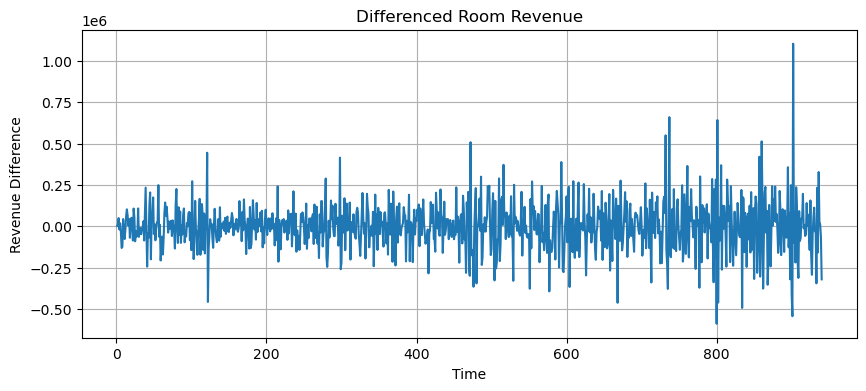

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_4_files_combined_no_outliers_for_AR['revenue_diff'])
plt.title('Differenced Room Revenue')
plt.xlabel('Time')
plt.ylabel('Revenue Difference')
plt.grid(True)
plt.show()


In [27]:
df_4_files_combined_no_outliers_for_AR['Date'] = pd.to_datetime(df_4_files_combined_no_outliers_for_AR['Date'])   # if not already
# Setting Date as the index for time series modelling
df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.set_index('Date')
# df_4_files_combined_no_outliers_for_AR.head()

In [28]:
# Dropping 1 row with Nan value in revenue_diff
df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.dropna(subset=['revenue_diff'])
# df_4_files_combined_no_outliers_for_AR

### ACF and PACF Analysis (After 1st order diff)

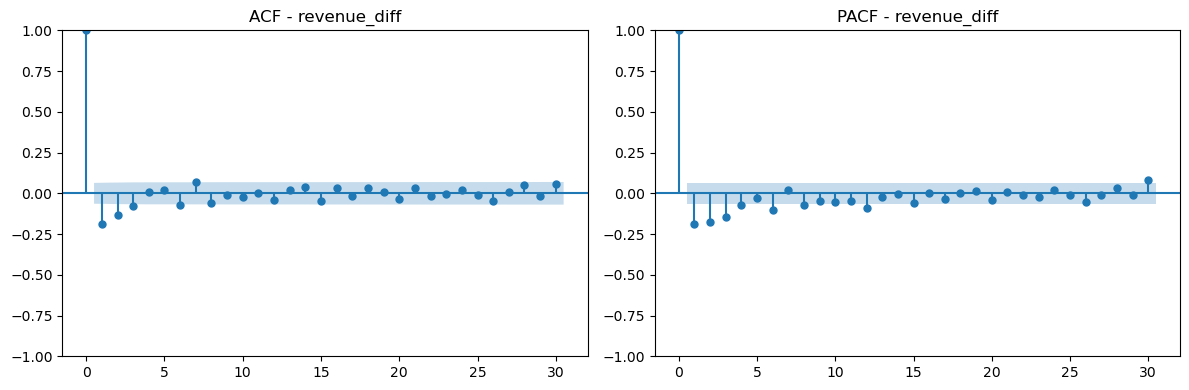

In [29]:
ACF_PACF(df_4_files_combined_no_outliers_for_AR, "revenue_diff")

*AutoCorrelation Function(ACF) Analysis*
- Strong spike at lag 1, all other lags are within the confidence band
- This suggests a Moving Average component of order 1 (MA(1))

*Partial AutoCorrelation Function(PACF) Analysis*
- Strong spike at lag 1, and the rest quickly die off
- This suggests an Autoregressive component of order 1 (AR(1))

### ADF Test (After 1st order diff)

In [30]:
ADF_test(df_4_files_combined_no_outliers_for_AR, "revenue_diff")

ADF Statistic: -12.575096768983812
p-value: 1.9653368083593016e-23
Critical Values:
   1%, -3.4374162506455126
   5%, -2.8646595140022946
   10%, -2.568431020409111


In [31]:
import pickle
df_4_files_combined_no_outliers_for_AR.to_pickle('df_4_files_combined_no_outliers_for_AR.pkl')

#### creating a new label for classification

Number of data points in each revenue bin:
1-2 Lakh        7
2-3 Lakh       19
3-4 Lakh       24
4-5 Lakh       40
5-6 Lakh       69
6-7 Lakh      114
7-8 Lakh      135
8-9 Lakh      103
9-10 Lakh      58
10-11 Lakh     42
11-12 Lakh     43
12-13 Lakh     41
13-14 Lakh     62
14-15 Lakh     62
15-16 Lakh     60
16-17 Lakh     40
17-18 Lakh     10
18-19 Lakh      8
19-20 Lakh      4
Name: Revenue Bin, dtype: int64


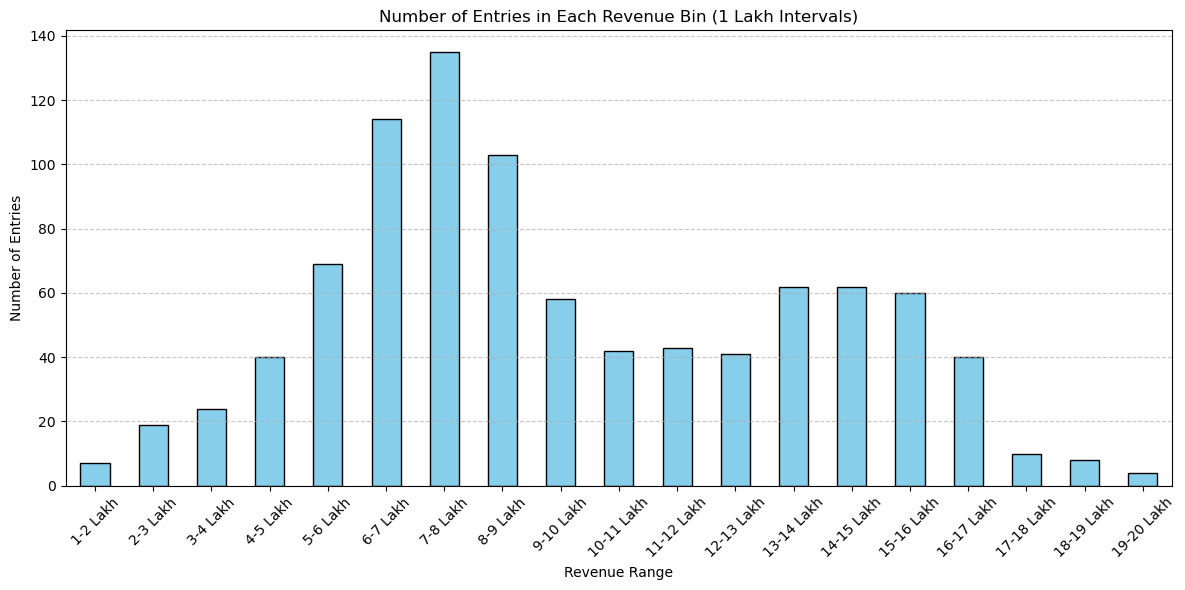

In [32]:
df_4_files_combined_no_outliers_copy_1=df_4_files_combined_no_outliers.copy()

start_bin = 100000
end_bin = ((cleaned_max_df_4_files_combined // 100000) + 1) * 100000  # round up to next 1 lakh
bins = np.arange(start_bin, end_bin + 1, 100000)    # create bin edges
labels = [f"{i}-{i+1} Lakh" for i in range(start_bin // 100000, end_bin // 100000)]

# Use pd.cut to segment the 'Room Revenue' into these custom bins
df_4_files_combined_no_outliers_copy_1['Revenue Bin'] = pd.cut(df_4_files_combined_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels, include_lowest=True)


bin_counts = df_4_files_combined_no_outliers_copy_1['Revenue Bin'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### new label to assign int for further training ease

Number of data points in each revenue bin:
1       7
2      19
3      24
4      40
5      69
6     114
7     135
8     103
9      58
10     42
11     43
12     41
13     62
14     62
15     60
16     40
17     10
18      8
19      4
Name: Revenue Whole Number, dtype: int64


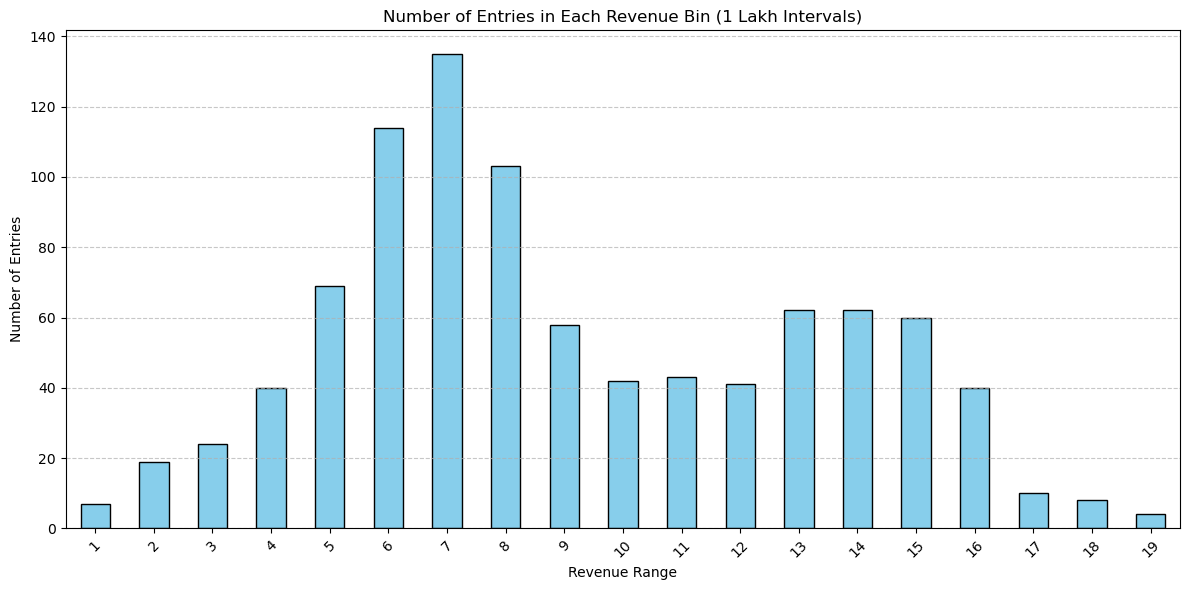

In [33]:
labels2 = [i for i in range(start_bin // 100000, end_bin // 100000)]
df_4_files_combined_no_outliers_copy_1['Revenue Whole Number'] = pd.cut(df_4_files_combined_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels2, include_lowest=True)
bin_counts2 = df_4_files_combined_no_outliers_copy_1['Revenue Whole Number'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts2)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### df_4_files_combined_no_outliers scaled

##### Min-Max_scaler

In [34]:
df_4_files_combined_no_outliers_min_max_scaled = df_4_files_combined_no_outliers.copy()


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_4_files_combined_no_outliers_min_max_scaled['Room Revenue'] = scaler.fit_transform(
    df_4_files_combined_no_outliers_min_max_scaled[['Room Revenue']]
)

# Verify the changes
print(df_4_files_combined_no_outliers_min_max_scaled['Room Revenue'].describe())


count    941.000000
mean       0.444096
std        0.213710
min        0.000000
25%        0.281939
50%        0.382148
75%        0.633660
max        1.000000
Name: Room Revenue, dtype: float64


##### Standard Scaller

In [36]:
df_4_files_combined_no_outliers_standard_scaled = df_4_files_combined_no_outliers.copy()

In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_4_files_combined_no_outliers_standard_scaled['Room Revenue'] = scaler.fit_transform(
    df_4_files_combined_no_outliers_standard_scaled[['Room Revenue']]
)

# Verify the changes
print(df_4_files_combined_no_outliers_standard_scaled['Room Revenue'].describe())


count    9.410000e+02
mean    -6.040746e-17
std      1.000532e+00
min     -2.079138e+00
25%     -7.591737e-01
50%     -2.900238e-01
75%      8.874864e-01
max      2.602593e+00
Name: Room Revenue, dtype: float64


## df for classification model:

In [38]:
import pickle
df_4_files_combined_no_outliers_copy_1.to_pickle('df_4_files_combined_no_outliers_copy_1.pkl')
df_4_files_combined_no_outliers_copy_1

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day,Revenue Bin,Revenue Whole Number
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday,6-7 Lakh,6
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday,6-7 Lakh,6
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday,6-7 Lakh,6
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday,6-7 Lakh,6
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday,6-7 Lakh,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,1427730,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday,14-15 Lakh,14
1152,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,1457687,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday,14-15 Lakh,14
1153,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,1468948,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday,14-15 Lakh,14
1154,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,1407306,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday,14-15 Lakh,14


## df for regression model:

In [39]:
df_4_files_combined_no_outliers.to_pickle('df_4_files_combined_no_outliers.pkl')
df_4_files_combined_no_outliers

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,1427730,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday
1152,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,1457687,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday
1153,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,1468948,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday
1154,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,1407306,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday


## df min-max scaled

In [40]:
df_4_files_combined_no_outliers_min_max_scaled.to_pickle('df_4_files_combined_no_outliers_min_max_scaled.pkl')
df_4_files_combined_no_outliers_min_max_scaled

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,0.258960,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,0.260369,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,0.267150,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,0.293959,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,0.283799,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,0.694276,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday
1152,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,0.710378,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday
1153,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,0.716430,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday
1154,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,0.683298,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday


## df standard scaled

In [41]:
df_4_files_combined_no_outliers_standard_scaled.to_pickle('df_4_files_combined_no_outliers_standard_scaled.pkl')
df_4_files_combined_no_outliers_standard_scaled

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day
0,2021-09-01,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,-0.866755,5280.6428,45.0,15.0,172.0,2021-09-01,2021-09-01,actual,Wednesday
1,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,-0.860162,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday
2,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,-0.828415,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday
3,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,-0.702902,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday
4,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,-0.750469,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,1.171275,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday
1152,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,1.246659,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday
1153,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,1.274996,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday
1154,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,1.119880,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday


# All file combined

In [42]:
df_comb_daywise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124367 entries, 0 to 124366
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  124367 non-null  object        
 1   Day                   124367 non-null  object        
 2   Rooms Sold            124367 non-null  float64       
 3   Arrival Rooms         124367 non-null  float64       
 4   Compliment Rooms      124367 non-null  float64       
 5   House Use             124367 non-null  float64       
 6   Individual Confirm    124367 non-null  float64       
 7   Occupancy %           124367 non-null  float64       
 8   Room Revenue          124367 non-null  float64       
 9   ARR                   124367 non-null  float64       
 10  Departure Rooms       124367 non-null  float64       
 11  OOO Rooms             124367 non-null  float64       
 12  Pax                   124367 non-null  float64       
 13 

#### extracting actual data

In [43]:
df_file_combined_actual = df_comb_daywise[df_comb_daywise['actual_or_forecast'] == 'actual']
df_file_combined_actual = df_file_combined_actual.reset_index(drop=True)
df_file_combined_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  681 non-null    object        
 1   Day                   681 non-null    object        
 2   Rooms Sold            681 non-null    float64       
 3   Arrival Rooms         681 non-null    float64       
 4   Compliment Rooms      681 non-null    float64       
 5   House Use             681 non-null    float64       
 6   Individual Confirm    681 non-null    float64       
 7   Occupancy %           681 non-null    float64       
 8   Room Revenue          681 non-null    float64       
 9   ARR                   681 non-null    float64       
 10  Departure Rooms       681 non-null    float64       
 11  OOO Rooms             681 non-null    float64       
 12  Pax                   681 non-null    float64       
 13  Total Room Inventory

#### counting duplicates

In [44]:
duplicate_count_for_combined_file = df_file_combined_actual.duplicated(subset=['Date']).sum()
print("Number of duplicate rows based on 'Date':", duplicate_count_for_combined_file)

Number of duplicate rows based on 'Date': 0


#### Removing duplicates if any

In [45]:
df_file_combined_actual = df_file_combined_actual.drop_duplicates(subset=['Date'], keep='first')

In [46]:
df_file_combined_actual

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.35,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,1483922.05,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226.37,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583.27,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588.01,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,1318216.48,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,1545264.25,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,1375503.05,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,1469983.95,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual


#### converting the revenue to int

In [47]:
df_file_combined_actual.loc[:, 'Room Revenue'] = df_file_combined_actual['Room Revenue'].astype(int)

C:\Users\jnami\AppData\Local\Temp\ipykernel_30056\3294574202.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_file_combined_actual.loc[:, 'Room Revenue'] = df_file_combined_actual['Room Revenue'].astype(int)


In [48]:
df_file_combined_actual

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,1483922,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,1318216,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,1545264,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,1375503,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,1469983,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual


### Analyzing data

Minimun room revenue: 287340
Maximum room revenue: 2791085


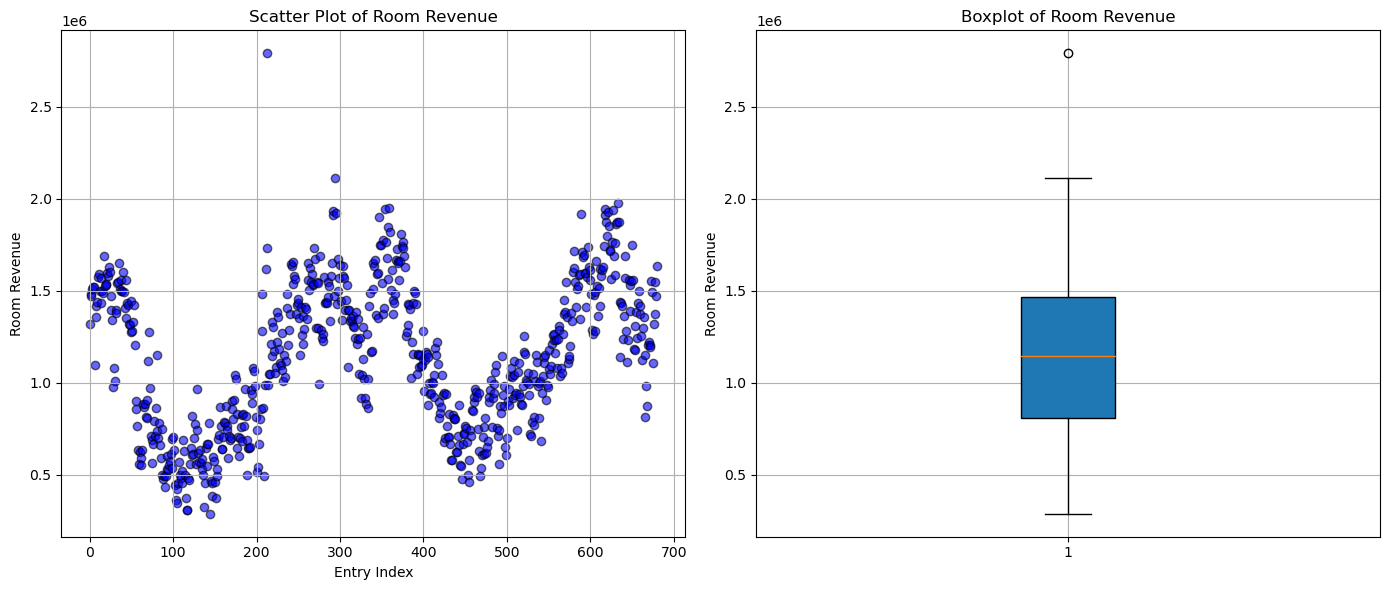

In [49]:
import matplotlib.pyplot as plt

df_file_combined_actual['Room Revenue'] = df_file_combined_actual['Room Revenue'].astype(int)

print("Minimun room revenue: " + str(df_file_combined_actual['Room Revenue'].min()))
print("Maximum room revenue: " + str(df_file_combined_actual['Room Revenue'].max()))


#PLotting the data to check for outliers
plt.figure(figsize=(14, 6))

# Scatter plot: entry index vs. Room Revenue
plt.subplot(1, 2, 1)
plt.scatter(df_file_combined_actual.index, df_file_combined_actual['Room Revenue'], alpha=0.6, color='blue', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue')
plt.grid(True)

# Boxplot: visualize distribution and potential outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_file_combined_actual['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()

### Removing outliers

In [50]:
Q1 = df_file_combined_actual['Room Revenue'].quantile(0.25)
Q3 = df_file_combined_actual['Room Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_file_combined_actual_no_outliers = df_file_combined_actual[(df_file_combined_actual['Room Revenue'] >= lower_bound) & (df_file_combined_actual['Room Revenue'] <= upper_bound)]

# Optional: Print the number of outliers removed
num_removed = len(df_file_combined_actual) - len(df_file_combined_actual_no_outliers)
print(f"Removed {num_removed} outliers out of {len(df_file_combined_actual)} entries.")

Removed 1 outliers out of 681 entries.


Cleaned Minimun room revenue: 287340
Cleaned Maximum room revenue: 2113546


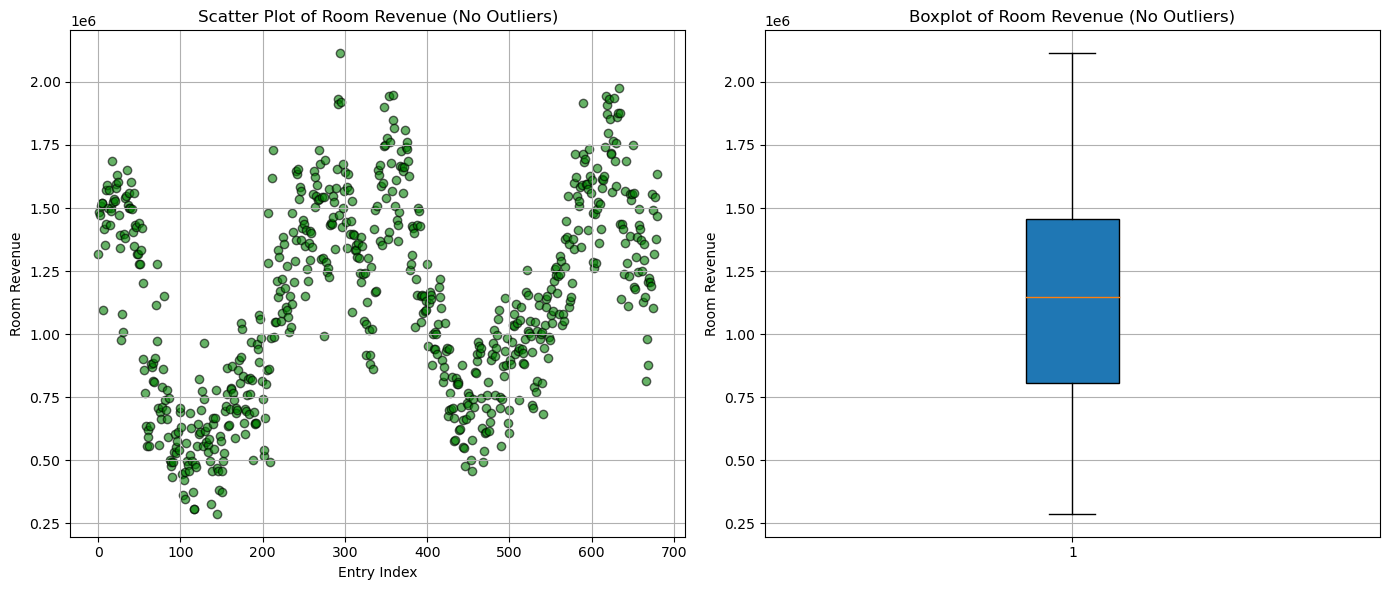

In [51]:
print("Cleaned Minimun room revenue: " + str(df_file_combined_actual_no_outliers['Room Revenue'].min()))
print("Cleaned Maximum room revenue: " + str(df_file_combined_actual_no_outliers['Room Revenue'].max()))

cleaned_min_df_file_combined_no_outliers = df_file_combined_actual_no_outliers['Room Revenue'].min()
cleaned_max_df_file_combined_no_outliers = df_file_combined_actual_no_outliers['Room Revenue'].max()
# Plot the cleaned data

plt.figure(figsize=(14, 6))

# Scatter Plot: Entry index vs. Room Revenue without outliers
plt.subplot(1, 2, 1)
plt.scatter(df_file_combined_actual_no_outliers.index, df_file_combined_actual_no_outliers['Room Revenue'], alpha=0.6, color='green', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue (No Outliers)')
plt.grid(True)

# Boxplot: Distribution of Room Revenue without outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_file_combined_actual_no_outliers['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue (No Outliers)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Creating a new label for classification

Number of data points in each revenue bin:
1-2 Lakh       0
2-3 Lakh       1
3-4 Lakh       8
4-5 Lakh      25
5-6 Lakh      33
6-7 Lakh      53
7-8 Lakh      46
8-9 Lakh      52
9-10 Lakh     49
10-11 Lakh    52
11-12 Lakh    47
12-13 Lakh    51
13-14 Lakh    54
14-15 Lakh    61
15-16 Lakh    67
16-17 Lakh    40
17-18 Lakh    20
18-19 Lakh     9
19-20 Lakh    11
20-21 Lakh     0
21-22 Lakh     1
Name: Revenue Bin, dtype: int64


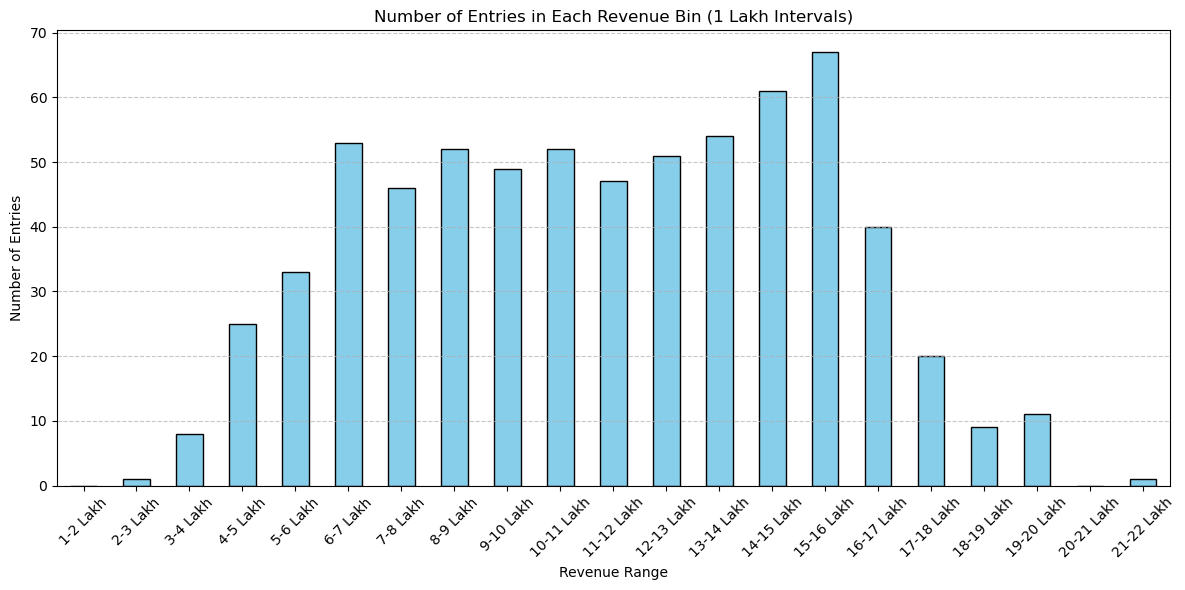

In [52]:
df_file_combined_actual_no_outliers_copy_1=df_file_combined_actual_no_outliers.copy()

start_bin = 100000
end_bin = ((cleaned_max_df_file_combined_no_outliers // 100000) + 1) * 100000  # round up to next 1 lakh
bins = np.arange(start_bin, end_bin + 1, 100000)    # create bin edges
labels = [f"{i}-{i+1} Lakh" for i in range(start_bin // 100000, end_bin // 100000)]

# Use pd.cut to segment the 'Room Revenue' into these custom bins
df_file_combined_actual_no_outliers_copy_1['Revenue Bin'] = pd.cut(df_file_combined_actual_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels, include_lowest=True)


bin_counts = df_file_combined_actual_no_outliers_copy_1['Revenue Bin'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### create a new label for further training

Number of data points in each revenue bin:
1      0
2      1
3      8
4     25
5     33
6     53
7     46
8     52
9     49
10    52
11    47
12    51
13    54
14    61
15    67
16    40
17    20
18     9
19    11
20     0
21     1
Name: Revenue Whole Number, dtype: int64


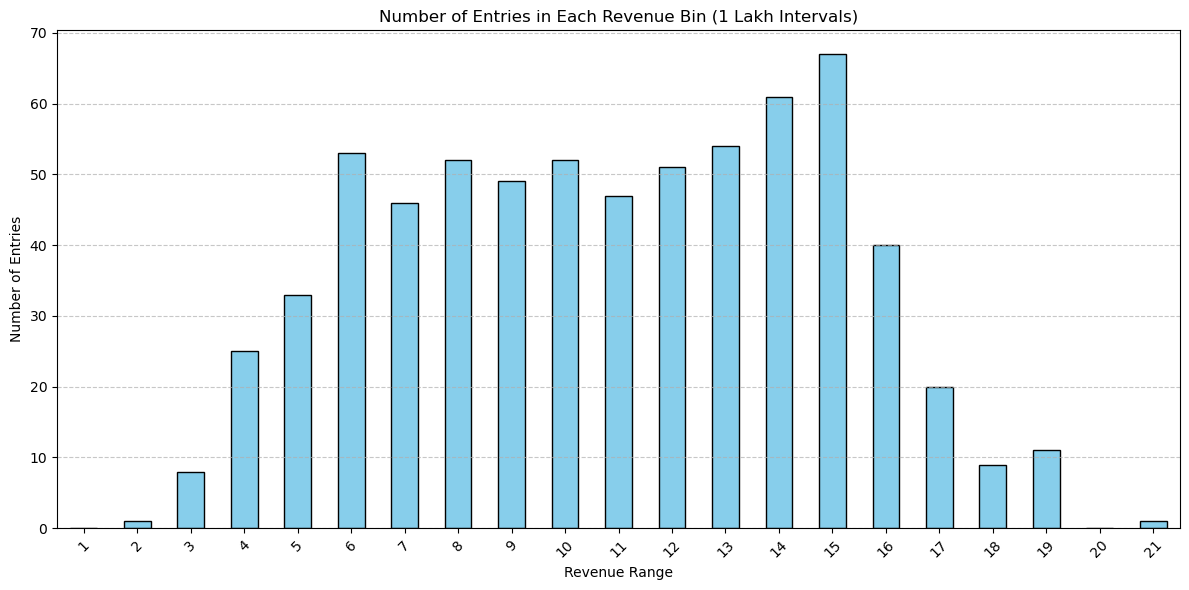

In [53]:
labels2 = [i for i in range(start_bin // 100000, end_bin // 100000)]
df_file_combined_actual_no_outliers_copy_1['Revenue Whole Number'] = pd.cut(df_file_combined_actual_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels2, include_lowest=True)
bin_counts2 = df_file_combined_actual_no_outliers_copy_1['Revenue Whole Number'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts2)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Scaling data

#### Min-Max Scaler

In [54]:
df_file_combined_actual_no_outliers_min_max_scaled = df_file_combined_actual_no_outliers.copy()

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_file_combined_actual_no_outliers_min_max_scaled['Room Revenue'] = scaler.fit_transform(
    df_file_combined_actual_no_outliers_min_max_scaled[['Room Revenue']]
)

# Verify the changes
print(df_file_combined_actual_no_outliers_min_max_scaled['Room Revenue'].describe())


count    680.000000
mean       0.463628
std        0.215866
min        0.000000
25%        0.284186
50%        0.470838
75%        0.640203
max        1.000000
Name: Room Revenue, dtype: float64


#### Standard Scaler

In [56]:
df_file_combined_actual_no_outliers_Standard_scaled = df_file_combined_actual_no_outliers.copy()

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_file_combined_actual_no_outliers_Standard_scaled['Room Revenue'] = scaler.fit_transform(
    df_file_combined_actual_no_outliers_Standard_scaled[['Room Revenue']]
)

# Verify the changes
print(df_file_combined_actual_no_outliers_Standard_scaled['Room Revenue'].describe())


count    6.800000e+02
mean    -1.880848e-16
std      1.000736e+00
min     -2.149340e+00
25%     -8.318760e-01
50%      3.342781e-02
75%      8.185890e-01
max      2.486577e+00
Name: Room Revenue, dtype: float64


## df combined files for classification: 

In [58]:
df_file_combined_actual_no_outliers_copy_1.to_pickle('df_file_combined_actual_no_outliers_copy_1.pkl')
df_file_combined_actual_no_outliers_copy_1

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast,Revenue Bin,Revenue Whole Number
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual,13-14 Lakh,13
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,1483922,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual,14-15 Lakh,14
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual,14-15 Lakh,14
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual,15-16 Lakh,15
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual,15-16 Lakh,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,1318216,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual,13-14 Lakh,13
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,1545264,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual,15-16 Lakh,15
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,1375503,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual,13-14 Lakh,13
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,1469983,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual,14-15 Lakh,14


## df combined files for regression: 

In [59]:
df_file_combined_actual_no_outliers.to_pickle('df_file_combined_actual_no_outliers.pkl')
df_file_combined_actual_no_outliers

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,1483922,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,1318216,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,1545264,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,1375503,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,1469983,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual


## df combined files with min max scaling: 

In [60]:
df_file_combined_actual_no_outliers_min_max_scaled.to_pickle('df_file_combined_actual_no_outliers_min_max_scaled.pkl')
df_file_combined_actual_no_outliers_min_max_scaled

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,0.564655,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,0.655228,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,0.649371,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,0.668185,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,0.675854,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,0.564491,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,0.688818,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,0.595860,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,0.647596,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual


## df combined files with standard scaling: 

In [61]:
df_file_combined_actual_no_outliers_Standard_scaled.to_pickle('df_file_combined_actual_no_outliers_Standard_scaled.pkl')
df_file_combined_actual_no_outliers_Standard_scaled

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,0.468355,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-07 00:00:00,Tuesday,115.0,38.0,2.0,3.0,56.0,95.83,0.888244,12903.67,11.0,10.0,199.0,120.0,2023-02-07,2023-02-07,actual
2,2023-02-08 00:00:00,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,0.861092,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
3,2023-02-09 00:00:00,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,0.948309,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
4,2023-02-10 00:00:00,Friday,114.0,40.0,3.0,2.0,76.0,95.00,0.983861,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2025-01-09 00:00:00,Thursday,81.0,38.0,1.0,2.0,51.0,72.97,0.467591,16274.28,19.0,19.0,163.0,111.0,2025-01-09,2025-01-09,actual
677,2025-01-10 00:00:00,Friday,96.0,34.0,2.0,2.0,62.0,84.96,1.043964,16096.50,14.0,17.0,187.0,113.0,2025-01-10,2025-01-10,actual
678,2025-01-11 00:00:00,Saturday,88.0,37.0,4.0,2.0,52.0,78.57,0.613017,15630.72,34.0,18.0,174.0,112.0,2025-01-11,2025-01-11,actual
679,2025-01-12 00:00:00,Sunday,102.0,58.0,4.0,2.0,54.0,91.07,0.852859,14411.61,22.0,18.0,184.0,112.0,2025-01-12,2025-01-12,actual


In [62]:
df_prepared = df_4_files_combined_no_outliers_for_AR.copy()
df_prepared = df_prepared.reset_index().rename(columns={"index": "Date"})
df_prepared

,Date,Total Room Inventory,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,snapshot_date,arrival_date,actual_or_forecast,Day,revenue_diff
0,2021-09-02,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455,5490.7527,32.0,16.0,170.0,2021-09-02,2021-09-02,actual,Thursday,2620.0
1,2021-09-03,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071,5457.5165,35.0,14.0,169.0,2021-09-03,2021-09-03,actual,Friday,12616.0
2,2021-09-04,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949,5887.4918,36.0,14.0,182.0,2021-09-04,2021-09-04,actual,Saturday,49878.0
3,2021-09-05,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046,5824.9731,38.0,13.0,182.0,2021-09-05,2021-09-05,actual,Sunday,-18903.0
4,2021-09-06,119.0,118.0,41.0,0.0,4.0,118.0,95.7983,682494,5783.8554,37.0,13.0,181.0,2021-09-06,2021-09-06,actual,Monday,18448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2024-03-27,103.0,91.0,45.0,1.0,3.0,95.0,88.3500,1427730,15689.3400,31.0,29.0,166.0,2024-03-27,2024-03-27,actual,Wednesday,328039.0
936,2024-03-28,103.0,97.0,46.0,2.0,3.0,88.0,94.1700,1457687,15027.7000,40.0,27.0,186.0,2024-03-28,2024-03-28,actual,Thursday,29957.0
937,2024-03-29,103.0,98.0,41.0,1.0,2.0,77.0,95.1500,1468948,14989.2700,42.0,27.0,193.0,2024-03-29,2024-03-29,actual,Friday,11261.0
938,2024-03-30,103.0,97.0,46.0,2.0,3.0,71.0,94.1700,1407306,14508.3100,47.0,27.0,185.0,2024-03-30,2024-03-30,actual,Saturday,-61642.0
